# Author-Rajni Durga
#GRIP NOVEMBER'21 THE SPARKS FOUNDATION

# TASK-2 Prediction using UnSupervised ML 
#Predict the optimum number of clusters and represnt it visually using the iris data set

In [46]:
#importing the required libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans 

In [70]:
#importing and reading the dataset
data=pd.read_csv('C:/Program Files/Python39/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
#values in the data set 
data.head(30)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [53]:
#getting all the unique values in SepalLengthCm
data["SepalLengthCm"].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [54]:
#getting all the unique values in SepalWidthCm
data["SepalWidthCm"].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [55]:
#Number of species in the dataset
data.groupby(["Species"]).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [56]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Visualisation

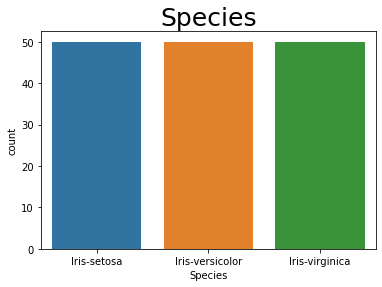

In [57]:
sns.countplot(x='Species',data=data)
plt.title('Species',fontsize=25)
plt.show()

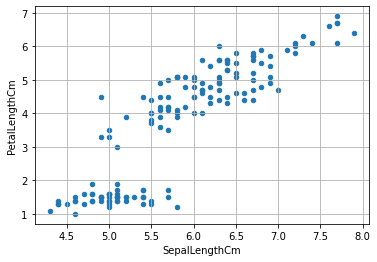

In [58]:
data.plot(kind="scatter",x='SepalLengthCm',y='PetalLengthCm')
plt.grid()

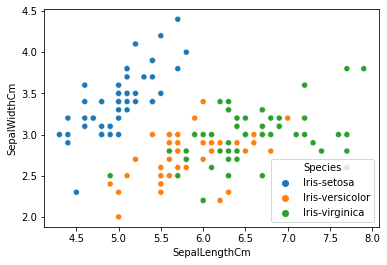

In [59]:
sns.scatterplot(x=data["SepalLengthCm"],y=data["SepalWidthCm"],hue=data["Species"])
plt.show()

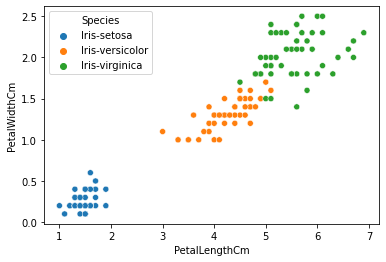

In [60]:
sns.scatterplot(x=data["PetalLengthCm"],y=data["PetalWidthCm"],hue=data["Species"])
plt.show()

# Using the elbow method to find the optimal number of clusters

In [61]:
#Taking values except for "id" and "Species"
x=data.iloc[:, [1,2,3,4]].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

C:\Users\Rajni Durga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


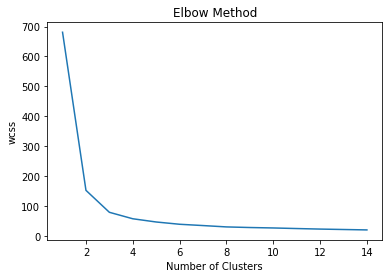

In [68]:
#k-means clustering 
from sklearn.cluster import KMeans 
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

# Training the K-Means model on the data

In [71]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Visualising the clusters

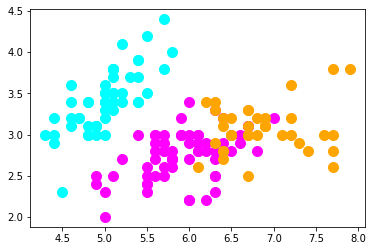

In [77]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
           s=100,c='magenta',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
           s=100,c='cyan',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
           s=100,c='orange',label='Iris-virginica')

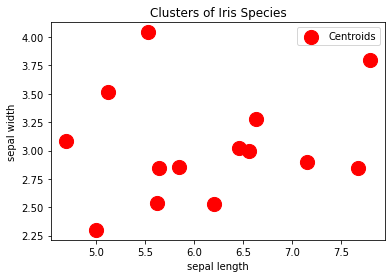

In [20]:
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=200,c='red',label='Centroids')
plt.title('Clusters of Iris Species')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

# Using the dendogram to find the optimal number of clusters

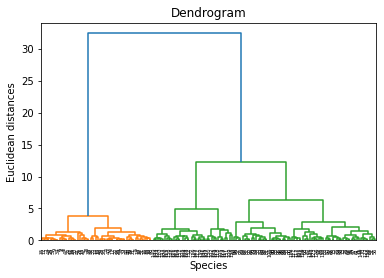

In [79]:
#Hierarchichal Clustering
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

# Training the Hierarchichal Clustering model on the data 

In [52]:
#AgglomerativeClustering 
from sklearn.cluster import AgglomerativeClustering 
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

# Visualising the clusters

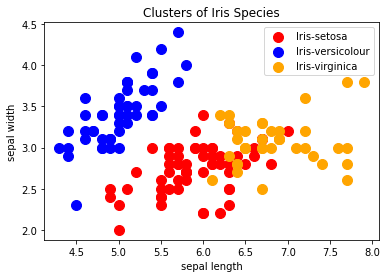

In [53]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
           s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
           s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
           s=100,c='orange',label='Iris-virginica')
plt.title('Clusters of Iris Species')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

# Conclusion-We have predicted the optimum number of clusters and represent it visually using the 'iris' data set